# Clinic Data Visualization

### Alex Lu | Spring Q 17-18 

First, let's import all of the stuff that we'll need

In [2]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from utils.indicator import *
from utils.file_ops import *
from datetime import datetime
%matplotlib inline

Now, we can start loading the data from our ad hoc report pulls. The first batch of data that we have contains: 
* Age(Year) 
* AppointmentID 
* AppointmentLocation
* City
* Comment
* DataFirstKnown
* DateTime
* DepartmentName
* EstablishedDateTime
* FreeTextDescription
* LocationAbbreviation
* MRN
* PatientID
* ProblemComment
* Reason
* VisitType
* Zip

In [3]:
path = "data/big_clinic_pull_5.13.csv"

df_big_pull = returnDF(path)
df_big_pull.head()


preparing to open csv at: data/big_clinic_pull_5.13.csv
done preparing dataframe


,None,Age(Year),AppointmentLocation,City,Comment,DateFirstKnown,DateTime,DepartmentName,EstablishedDateTime,FreeTextDescription,LocationAbbreviation,MRN,PatientID,ProblemComment,ProviderName,Reason,VisitType,Zip,﻿AppointmentID
0,NaN,56,TRUE,Sunnyvale,,5/4/13 8:25,5/18/13 11:50,PFC,5/4/13 9:18,Diabetes (unknown type),PFC,,2572,Father; patient has never been screened,PFC F/U APPT,Adverse reaction to medication,PFC FOLLOW UP VISIT,94087,6027
1,NaN,56,TRUE,,,5/4/13 8:25,5/18/13 11:50,PFC,5/4/13 9:18,Diabetes (unknown type),PFC,,2572,Father; patient has never been screened,PFC F/U APPT,Adverse reaction to medication,PFC FOLLOW UP VISIT,,6027
2,NaN,56,TRUE,,,5/4/13 8:25,5/18/13 11:50,PFC,5/4/13 9:18,Diabetes (unknown type),PFC,,2572,Father; patient has never been screened,PFC F/U APPT,Adverse reaction to medication,PFC FOLLOW UP VISIT,,6027
3,NaN,56,TRUE,,,5/4/13 8:25,5/18/13 11:50,PFC,5/4/13 9:18,Diabetes (unknown type),PFC,,2572,Father; patient has never been screened,PFC F/U APPT,Adverse reaction to medication,PFC FOLLOW UP VISIT,,6027
4,NaN,56,TRUE,Sunnyvale,,5/4/13 8:25,6/1/13 9:10,PFC,5/4/13 9:18,Diabetes (unknown type),PFC,,2572,Father; patient has never been screened,PFC F/U APPT,,PFC FOLLOW UP VISIT,94087,5914


While we haven't decided exactly what we want to pull from this yet, we can confirm that the comment field seems to be very blank. The MRN field also seems to be blank. Further, the paradigm of pulling by appointment ID seems less effective than pulling by visitID. In fact, until we pivot by patientID or appointmentID, we're even going to have a tough time distributing patients by Zip because we have some 1:n joins in here. 

In [4]:

path2 = "data/VisitToDiagnosis5.14.csv"

df_V2D = pd.read_csv(path2, error_bad_lines=False, header=0)
df_V2D.head()



,VisitId,LocationAbbreviation,PatientId,MRN,Age(Year),VisitType,DateFirstKnown,VisitDateTime,Diagnosis,ICDCode,Comment
0,18529,AFC,6526,NaN,77,ARBOR GENERAL VISIT,4/29/2018 9:10:07 AM,4/29/2018 10:00:00 AM,BENIGN POSITIONAL VERTIGO,386.11,NaN
1,18579,AFC,6526,NaN,77,LAB FOLLOW-UP NOTE,4/29/2018 9:10:07 AM,5/6/2018 12:26:24 PM,NaN,NaN,NaN
2,18534,AFC,6528,NaN,73,ARBOR GENERAL VISIT,4/29/2018 10:28:15 AM,4/29/2018 11:15:00 AM,"DIABETES MELLITUS, TYPE II",250.00,NaN
3,18576,AFC,6528,NaN,73,LAB FOLLOW-UP NOTE,4/29/2018 10:28:15 AM,5/6/2018 11:57:41 AM,NaN,NaN,NaN
4,18565,AFC,6542,NaN,72,ARBOR GENERAL VISIT,5/6/2018 8:56:51 AM,5/6/2018 9:15:00 AM,"ANGINA PECTORIS, UNSTABLE",411.1,NaN


In [5]:
path3 = 'data/QIdudes.csv'
df_QI = returnDF(path3)


preparing to open csv at: data/QIdudes.csv
done preparing dataframe


We want to filter on the time of visit for longitudinal visualization. First, we should do a conversion on the format of the time string to make it more workable. Then, we're going to make this new 'ts' column the index, and drop the string form VisitDate series. 

In [6]:
df_QI['ts'] = pd.to_datetime((df_QI['VisitDate']))
df_QI.index = df_QI['ts']
df_QI = df_QI.iloc[::-1]
del df_QI['VisitDate']


In [7]:
def time_filter(t1, t2, df):
    # accepts numerical tuples of form (year, mon, day)
    print df.head(3)
    bound1 = datetime(*t1)
    bound2 = datetime(*t2)
    print bound1, bound2
    return df[bound1:bound2]

In [8]:
# let's take a look
df_QI_2017 = time_filter((2017,10,1),(2017,11,1),df_QI)
df_QI_2017.tail(30)


                      LastModifiedDateTime LocationName Note PropertyName  \
ts                                                                          
2017-09-30 09:50:00      9/30/2017 10:43:2          PFC        SHxPackYrs   
2017-09-30 09:50:00  9/30/2017 10:43:22 AM          PFC           SHxEtOH   
2017-09-30 09:50:00  9/30/2017 10:43:22 AM          PFC   SHxRecreational   

                           Note PropertyValue PatientNumber      ProviderName  \
ts                                                                              
2017-09-30 09:50:00  no cigarettes-smoked MJ       N0062774  DOBOS, KATHARINE   
2017-09-30 09:50:00                       Yes      N0062774  DOBOS, KATHARINE   
2017-09-30 09:50:00                       Yes      N0062774  DOBOS, KATHARINE   

                                     ts  
ts                                       
2017-09-30 09:50:00 2017-09-30 09:50:00  
2017-09-30 09:50:00 2017-09-30 09:50:00  
2017-09-30 09:50:00 2017-09-30 09:50:00 

,LastModifiedDateTime,LocationName,Note PropertyName,Note PropertyValue,PatientNumber,ProviderName,ts
ts,,,,,,,
2017-10-29 09:30:00,10/29/2017 11:57:29 AM,ARBOR,QIPHQ2,Not Questioned,N0012530,"KIANG, ALAN",2017-10-29 09:30:00
2017-10-29 09:30:00,10/29/2017 11:57:29 AM,ARBOR,WriteStudentAssessment,No,N0012530,"KIANG, ALAN",2017-10-29 09:30:00
2017-10-29 09:30:00,10/29/2017 11:57:29 AM,ARBOR,WriteStudentPlan,No,N0012530,"KIANG, ALAN",2017-10-29 09:30:00
2017-10-29 09:30:00,10/29/2017 11:57:29 AM,ARBOR,StudentSummaryText,41-yr old female came in for routine labs give...,N0012530,"KIANG, ALAN",2017-10-29 09:30:00
2017-10-29 09:30:00,10/29/2017 11:57:29 AM,ARBOR,QIDiabetes,No,N0012530,"KIANG, ALAN",2017-10-29 09:30:00
2017-10-29 09:30:00,10/29/2017 11:57:29 AM,ARBOR,QIMammo,No,N0012530,"KIANG, ALAN",2017-10-29 09:30:00
2017-10-29 09:30:00,10/29/2017 11:57:29 AM,ARBOR,QIMammoReason,she declined,N0012530,"KIANG, ALAN",2017-10-29 09:30:00
2017-10-29 09:30:00,10/29/2017 11:57:29 AM,ARBOR,QIPHQ1,Not Questioned,N0012530,"KIANG, ALAN",2017-10-29 09:30:00
2017-10-29 09:30:00,10/29/2017 11:57:29 AM,ARBOR,QIPap,Yes,N0012530,"KIANG, ALAN",2017-10-29 09:30:00


We want to test our ability to visualize data values after they have all been pivoted. It is important to note that we have qualitative data, which means we probably have to use bar graphs :/ 

In [9]:
arbor_data = df_QI[df_QI['LocationName'] == 'ARBOR']
pfc_data = df_QI[df_QI['LocationName'] == 'PFC']

arbor_pivot = arbor_data.pivot_table(index='PatientNumber',columns='Note PropertyName',values='Note PropertyValue', aggfunc='first')
pfc_pivot = pfc_data.pivot_table(index='PatientNumber',columns='Note PropertyName',values='Note PropertyValue', aggfunc='first')

#df_QI.head(5)
arbor_pivot.head(10)

#pfc_pivot.head(5)

Note PropertyName,HIVTestAgreedToTest,HIVTestConsentRead,HIVTestNA,QIDiabetes,QIDiabetesA1C,QIDiabetesFoot,QIDiabetesOphtho,QIDiabetesReason,QIFitReason,QIFitTest,...,SHxPackYrs,SHxRecreational,SHxSexualAct,SHxSmokeReason,SHxSmoker,StudentAssessment,StudentPlan,StudentSummaryText,WriteStudentAssessment,WriteStudentPlan
PatientNumber,,,,,,,,,,,,,,,,,,,,,
12,None,None,None,No,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2612,None,None,None,No,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4A,None,None,None,No,None,None,None,None,moving back to china,No,...,None,None,None,None,None,None,None,None,None,None
G3,None,None,None,Yes,None,None,None,she will follow up next time,None,No,...,None,None,None,None,None,None,None,None,None,None
N0008698,None,None,None,Yes,True,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
N0012530,yes,yes,None,No,None,None,None,None,None,None,...,None,None,None,None,None,None,None,41-yr old female came in for routine labs give...,No,No
N0014256,None,None,None,No,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
N0017793,None,None,None,No,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
N0021126,None,None,None,No,None,None,None,None,None,None,...,None,None,None,None,None,Ms. Zhao's nocturnal cough without signs of fe...,1. OTC allergy medications and cough supressan...,Ms. Zhao is a 65 Y woman with a 4d history of ...,Yes,Yes


preparing to generate full qi summary text
QIDiabetes
No                175
Not Questioned      8
Yes                20
dtype: int64


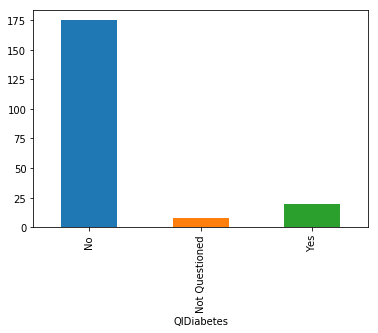

QIDiabetesA1C
True    11
dtype: int64


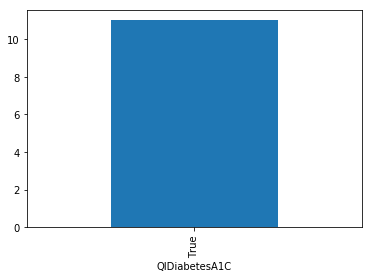

QIDiabetesFoot
True    4
dtype: int64


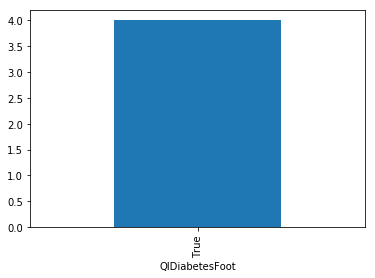

QIDiabetesOphtho
True    3
dtype: int64


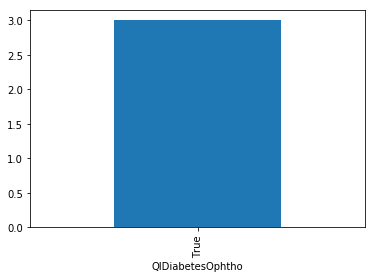

QIDiabetesPneumovax: no records found (assume 0)
QIMammo
Already Received     3
No                  29
Not Indicated       10
Yes                  3
dtype: int64


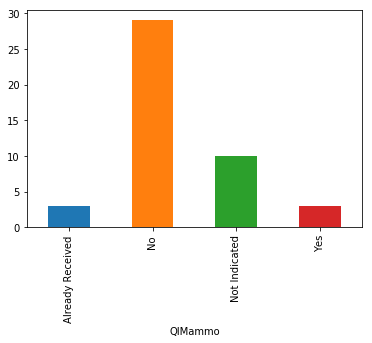

QIMentalHealth1
No     5
Yes    3
dtype: int64


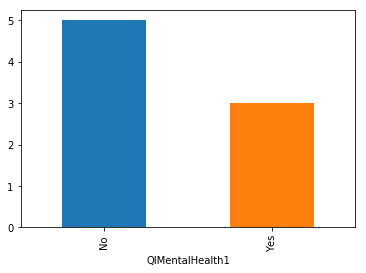

QIMentalHealth2
No     4
Yes    5
dtype: int64


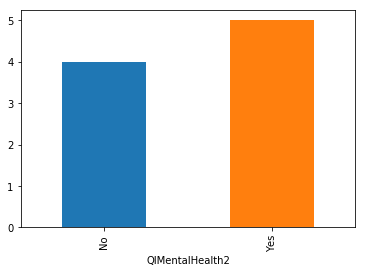

QIMicroalbumin
True    6
dtype: int64


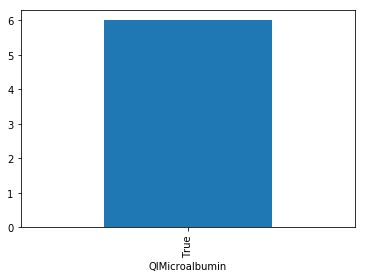

QIPHQ1
No                120
Not Questioned     71
Yes                12
dtype: int64


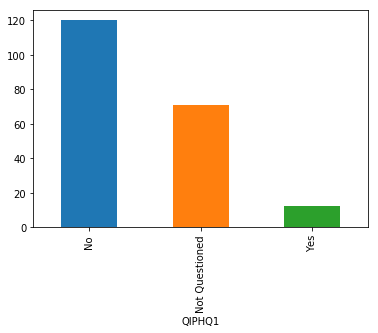

QIPHQ2
No                123
Not Questioned     68
Yes                12
dtype: int64


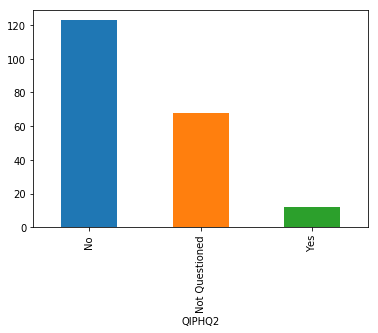

QIPap
Already Received    12
No                  24
Not Indicated       29
Yes                 10
dtype: int64


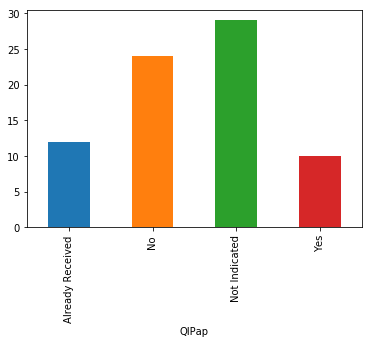

In [10]:

complete_qisummary(arbor_pivot)

Can we just talk about how useless complete visualization is? even if i get these bar graphs it's not really useful to just know the distribution of answers to these QI qusetions 

In [11]:
path_visits = "data/visitTbl.csv"
df_visits = pd.read_csv(path_visits, error_bad_lines=False, header=0)
df_visits.head()

,VisitId,LocationAbbreviation,PatientId,MRN,Age(Year),VisitType,DateFirstKnown,VisitDateTime,Diagnosis,ICDCode,Comment
0,26,PFC,35,NaN,68,MISC NOTE,7/22/2011 6:05:10 PM,7/22/2011 6:15:38 PM,GENERAL LAB SCREENING (V72.60),V72.60#9,NaN
1,27,PFC,38,NaN,71,MISC NOTE,7/22/2011 6:20:05 PM,7/22/2011 6:26:06 PM,GENERAL LAB SCREENING (V72.60),V72.60#9,NaN
2,28,PFC,26,NaN,64,MISC NOTE,7/22/2011 5:27:07 PM,7/22/2011 6:29:04 PM,NaN,NaN,NaN
3,29,PFC,37,NaN,70,MISC NOTE,7/22/2011 6:14:25 PM,7/22/2011 6:39:57 PM,GENERAL LAB SCREENING (V72.60),V72.60#9,NaN
4,30,PFC,40,NaN,66,MISC NOTE,7/22/2011 6:41:11 PM,7/22/2011 6:44:36 PM,HEPATITIS B SCREENING (070.32),070.32,NaN


In [12]:
df_visits['VisitDateTimeTS'] = pd.to_datetime((df_visits['VisitDateTime']))
df_visits['DateFirstKnownTS'] = pd.to_datetime((df_visits['DateFirstKnown']))
df_visits.index = df_visits['DateFirstKnownTS']
#df_visits = df_visits.iloc[::-1]
del df_visits['DateFirstKnown']
del df_visits['VisitDateTime']

arbor_visits = df_visits[df_visits['LocationAbbreviation'] == 'AFC']
pfc_visits = df_visits[df_visits['LocationAbbreviation'] == 'PFC']



In [13]:
df_visits['2011-7']

,VisitId,LocationAbbreviation,PatientId,MRN,Age(Year),VisitType,Diagnosis,ICDCode,Comment,VisitDateTimeTS,DateFirstKnownTS
DateFirstKnownTS,,,,,,,,,,,
2011-07-22 18:05:10,26,PFC,35,NaN,68,MISC NOTE,GENERAL LAB SCREENING (V72.60),V72.60#9,NaN,2011-07-22 18:15:38,2011-07-22 18:05:10
2011-07-22 18:20:05,27,PFC,38,NaN,71,MISC NOTE,GENERAL LAB SCREENING (V72.60),V72.60#9,NaN,2011-07-22 18:26:06,2011-07-22 18:20:05
2011-07-22 17:27:07,28,PFC,26,NaN,64,MISC NOTE,NaN,NaN,NaN,2011-07-22 18:29:04,2011-07-22 17:27:07
2011-07-22 18:14:25,29,PFC,37,NaN,70,MISC NOTE,GENERAL LAB SCREENING (V72.60),V72.60#9,NaN,2011-07-22 18:39:57,2011-07-22 18:14:25
2011-07-22 18:41:11,30,PFC,40,NaN,66,MISC NOTE,HEPATITIS B SCREENING (070.32),070.32,NaN,2011-07-22 18:44:36,2011-07-22 18:41:11
2011-07-22 18:43:38,31,PFC,42,NaN,53,MISC NOTE,GENERAL LAB SCREENING (V72.60),V72.60#9,NaN,2011-07-22 18:48:19,2011-07-22 18:43:38
2011-07-22 17:36:10,32,PFC,29,NaN,73,MISC NOTE,NaN,NaN,NaN,2011-07-22 18:54:20,2011-07-22 17:36:10
2011-07-22 17:29:40,33,PFC,27,NaN,32,MISC NOTE,NaN,NaN,NaN,2011-07-22 18:57:01,2011-07-22 17:29:40
2011-07-22 17:42:53,34,PFC,31,NaN,66,MISC NOTE,NaN,NaN,NaN,2011-07-22 19:03:27,2011-07-22 17:42:53


In [14]:
arbor_visits.head(30)


,VisitId,LocationAbbreviation,PatientId,MRN,Age(Year),VisitType,Diagnosis,ICDCode,Comment,VisitDateTimeTS,DateFirstKnownTS
DateFirstKnownTS,,,,,,,,,,,
2011-07-23 13:46:49,66,AFC,56,NaN,28,ARBOR GENERAL VISIT,"SPRAIN, WRIST",842.00,NaN,2011-07-23 11:00:00,2011-07-23 13:46:49
2011-07-24 09:26:50,75,AFC,67,NaN,29,ARBOR GENERAL VISIT,URINARY TRACT INFECTION,599.0,NaN,2011-07-24 09:00:00,2011-07-24 09:26:50
2011-07-24 09:26:06,73,AFC,66,NaN,57,ARBOR GENERAL VISIT,DEPRESSION,311,NaN,2011-07-24 09:15:00,2011-07-24 09:26:06
2011-07-24 09:26:06,73,AFC,66,NaN,57,ARBOR GENERAL VISIT,PANIC DISORDER,300.01,NaN,2011-07-24 09:15:00,2011-07-24 09:26:06
2011-07-24 09:26:06,73,AFC,66,NaN,57,ARBOR GENERAL VISIT,HYPOTHYROIDISM,244.9,NaN,2011-07-24 09:15:00,2011-07-24 09:26:06
2011-07-24 09:26:06,73,AFC,66,NaN,57,ARBOR GENERAL VISIT,WEIGHT LOSS,783.21,NaN,2011-07-24 09:15:00,2011-07-24 09:26:06
2011-07-24 09:23:10,76,AFC,65,NaN,30,ARBOR GENERAL VISIT,EYE PAIN,379.91,NaN,2011-07-24 09:30:00,2011-07-24 09:23:10
2011-07-24 09:23:10,76,AFC,65,NaN,30,ARBOR GENERAL VISIT,JAW PAIN,526.9,NaN,2011-07-24 09:30:00,2011-07-24 09:23:10
2011-07-24 09:23:10,76,AFC,65,NaN,30,ARBOR GENERAL VISIT,"ASTHMA, MILD INTERMITTENT",493.90,NaN,2011-07-24 09:30:00,2011-07-24 09:23:10


In [15]:
pfc_visits.head(10)

,VisitId,LocationAbbreviation,PatientId,MRN,Age(Year),VisitType,Diagnosis,ICDCode,Comment,VisitDateTimeTS,DateFirstKnownTS
DateFirstKnownTS,,,,,,,,,,,
2011-07-22 18:05:10,26,PFC,35,NaN,68,MISC NOTE,GENERAL LAB SCREENING (V72.60),V72.60#9,NaN,2011-07-22 18:15:38,2011-07-22 18:05:10
2011-07-22 18:20:05,27,PFC,38,NaN,71,MISC NOTE,GENERAL LAB SCREENING (V72.60),V72.60#9,NaN,2011-07-22 18:26:06,2011-07-22 18:20:05
2011-07-22 17:27:07,28,PFC,26,NaN,64,MISC NOTE,NaN,NaN,NaN,2011-07-22 18:29:04,2011-07-22 17:27:07
2011-07-22 18:14:25,29,PFC,37,NaN,70,MISC NOTE,GENERAL LAB SCREENING (V72.60),V72.60#9,NaN,2011-07-22 18:39:57,2011-07-22 18:14:25
2011-07-22 18:41:11,30,PFC,40,NaN,66,MISC NOTE,HEPATITIS B SCREENING (070.32),070.32,NaN,2011-07-22 18:44:36,2011-07-22 18:41:11
2011-07-22 18:43:38,31,PFC,42,NaN,53,MISC NOTE,GENERAL LAB SCREENING (V72.60),V72.60#9,NaN,2011-07-22 18:48:19,2011-07-22 18:43:38
2011-07-22 17:36:10,32,PFC,29,NaN,73,MISC NOTE,NaN,NaN,NaN,2011-07-22 18:54:20,2011-07-22 17:36:10
2011-07-22 17:29:40,33,PFC,27,NaN,32,MISC NOTE,NaN,NaN,NaN,2011-07-22 18:57:01,2011-07-22 17:29:40
2011-07-22 17:42:53,34,PFC,31,NaN,66,MISC NOTE,NaN,NaN,NaN,2011-07-22 19:03:27,2011-07-22 17:42:53


In [17]:
def temporal_distribution(df, ts_name = 'ts'):
    '''

    '''
    time_gb = df.groupby(df[ts_name].dt.month)
    plt.figure()
    time_gb.plot()
    plt.show()


In [34]:
arbor_visits_2011 = arbor_visits['2011']
arbor_visits_2011.describe()

,VisitId,PatientId,Age(Year)
count,1622.000000,1622.000000,1622.000000
mean,3452.175709,466.813194,53.440197
std,4391.666478,226.015753,15.026682
min,66.000000,30.000000,11.000000
25%,697.000000,271.000000,42.000000
50%,1304.000000,501.500000,54.000000
75%,4724.500000,670.000000,66.000000
max,18744.000000,818.000000,95.000000


In [22]:
arbor_visits_gb = arbor_visits_2011.groupby(arbor_visits_2011['DateFirstKnownTS'])
arbor_visits_gb.plot()

ValueError: view limit minimum -36731.46875 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function post_execute at 0x10e978848> (for post_execute):


ValueError: view limit minimum -36731.46875 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36731.46875 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 432x288 with 1 Axes>

In [18]:
temporal_distribution(arbor_visits['2011'], ts_name='DateFirstKnownTS')


ValueError: view limit minimum -36794.1207164 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function post_execute at 0x10e978848> (for post_execute):


ValueError: view limit minimum -36794.1207164 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 432x288 with 0 Axes>

ValueError: view limit minimum -36794.1207164 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 432x288 with 1 Axes>

In [ ]:
temporal_distribution()